In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
daily_df = pd.read_csv('/content/drive/MyDrive/SN_d_tot_V2.0.csv', sep=';')

In [ ]:
daily_df.head()

,year,month,day,date_frac,total_sunspots,std_dev,num_obs,def_inc
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [ ]:
daily_df

,year,month,day,date_frac,total_sunspots,std_dev,num_obs,def_inc
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
74625,2022,4,26,2022.316,132,21.8,43,0
74626,2022,4,27,2022.319,132,14.8,43,0
74627,2022,4,28,2022.322,135,15.5,42,0
74628,2022,4,29,2022.325,107,21.4,39,0


In [ ]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74630 entries, 0 to 74629
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            74630 non-null  int64  
 1   month           74630 non-null  int64  
 2   day             74630 non-null  int64  
 3   date_frac       74630 non-null  float64
 4   total_sunspots  74630 non-null  int64  
 5   std_dev         74630 non-null  float64
 6   num_obs         74630 non-null  int64  
 7   def_inc         74630 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.6 MB


In [ ]:
daily_df.describe()

,year,month,day,date_frac,total_sunspots,std_dev,num_obs,def_inc
count,74630.000000,74630.000000,74630.000000,74630.000000,74630.000000,74630.000000,74630.000000,74630.000000
mean,1919.665416,6.516522,15.729130,1920.164876,78.580142,6.905413,4.867279,0.998392
std,58.985539,3.449999,8.799916,58.985309,77.303259,4.792459,8.838895,0.040067
min,1818.000000,1.000000,1.000000,1818.001000,-1.000000,-1.000000,0.000000,0.000000
25%,1869.000000,4.000000,8.000000,1869.081750,15.000000,2.900000,1.000000,1.000000
50%,1920.000000,7.000000,16.000000,1920.166500,57.000000,6.500000,1.000000,1.000000
75%,1971.000000,10.000000,23.000000,1971.247250,123.000000,10.000000,1.000000,1.000000
max,2022.000000,12.000000,31.000000,2022.327000,528.000000,77.700000,69.000000,1.000000


In [ ]:
daily_df.isnull().sum()

,0
year,0
month,0
day,0
date_frac,0
total_sunspots,0
std_dev,0
num_obs,0
def_inc,0


In [ ]:
# Function to determine the time unit and create a datetime column
def create_datetime_column(df):
    # Check for year, month, and day columns
    potential_date_cols = ['year', 'month', 'day']  # Initialize with common names

    # Find actual column names in df that resemble year, month, day
    for col in df.columns:
      if "year" in col.lower():
        potential_date_cols[0] = col
      if "month" in col.lower():
        potential_date_cols[1] = col
      if "day" in col.lower():
        potential_date_cols[2] = col

    # Check if all date components exist
    if all(col in df.columns for col in potential_date_cols):
      try:
        df['datetime'] = pd.to_datetime(df[potential_date_cols])
        return df
      except:
        print("Error creating datetime column. Check data types in the date columns.")
        return df  # Return original DataFrame if error occurs
    else:
      print("Columns 'year', 'month', and 'day' (or similar) not found in the DataFrame.")
      return df

daily_df = create_datetime_column(daily_df)

In [ ]:
daily_df.head()

,year,month,day,date_frac,total_sunspots,std_dev,num_obs,def_inc,datetime
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/r2_93dg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/dxd_16fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77607', 'data', 'file=/tmp/tmpbfhtz2rv/r2_93dg9.json', 'init=/tmp/tmpbfhtz2rv/dxd_16fr.json', 'output', 'file=/tmp/tmpbfhtz2rv/prophet_modelxv2zmb5v/prophet_model-20241126210246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:02:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:03:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Sunspot Predictions:
100 days into the future: 18.693604539107668
200 days into the future: 24.996843183098544
365 days into the future: 27.62307206569308


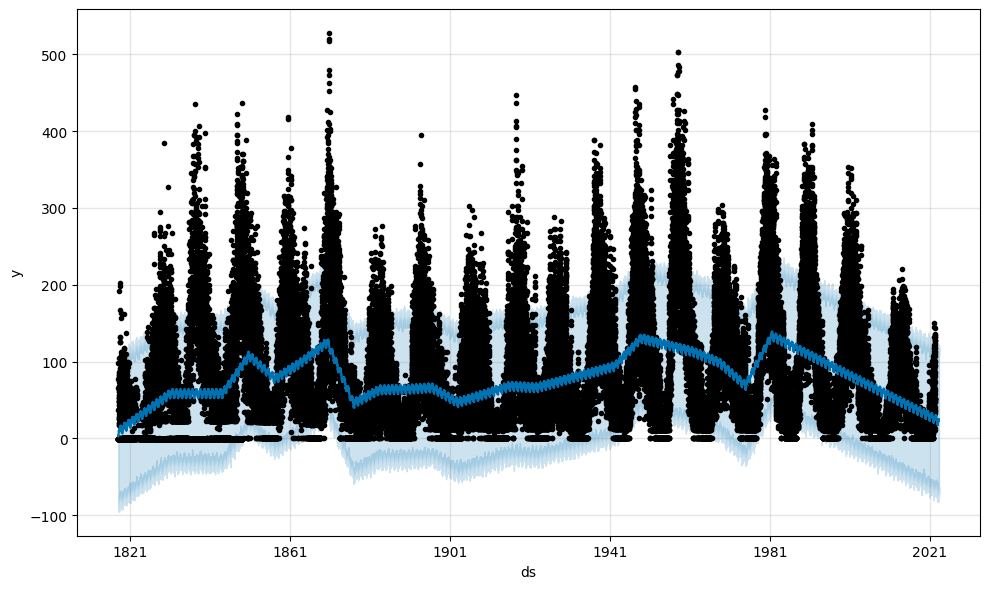

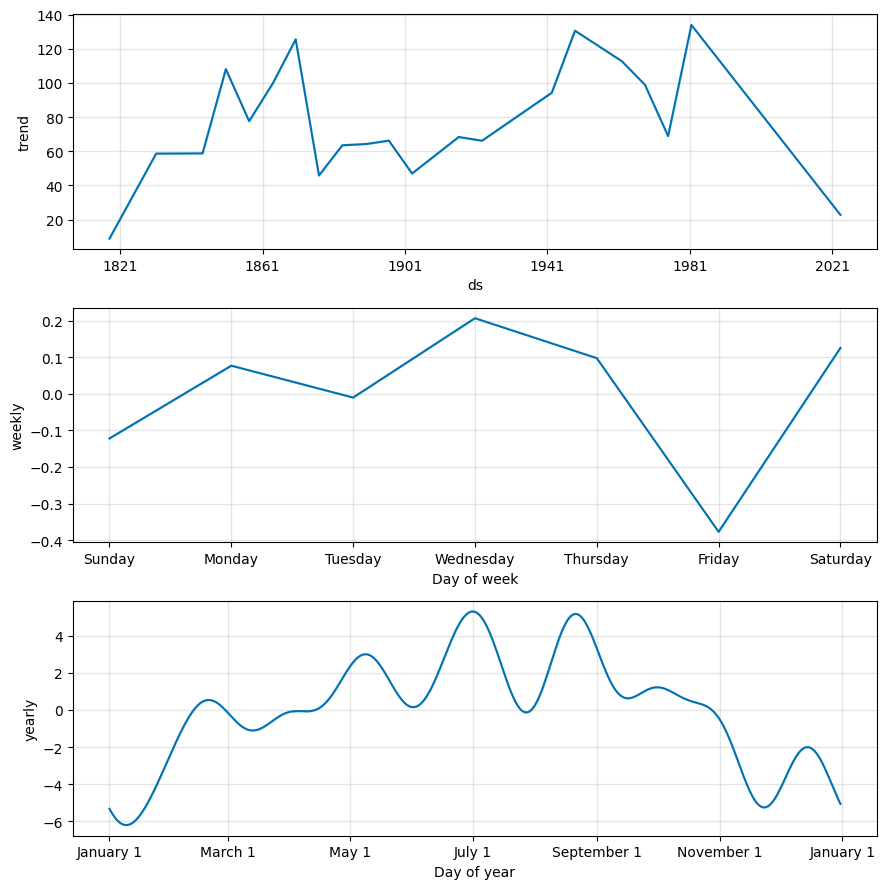

In [ ]:
!pip install prophet

from prophet import Prophet

# Prepare the data for Prophet
daily_df_prophet = daily_df[['datetime', 'total_sunspots']].rename(columns={'datetime': 'ds', 'total_sunspots': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(daily_df_prophet)

# Create future dates for prediction
future = model.make_future_dataframe(periods=365, freq='D') # Predict for 365 days

# Make predictions
forecast = model.predict(future)

# Print predictions for 100, 200, and 365 days into the future
print("Sunspot Predictions:")
for days in [100, 200, 365]:
  predicted_sunspots = forecast.iloc[-days]['yhat']
  print(f"{days} days into the future: {predicted_sunspots}")

# Plot the forecast
fig1 = model.plot(forecast)
# Plot the components of the forecast
fig2 = model.plot_components(forecast)

<ipython-input-12-03d65d20d37c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = daily_df.groupby(pd.Grouper(key='datetime', freq='M')).sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/v__g4tfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/xx4ggrb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56234', 'data', 'file=/tmp/tmpbfhtz2rv/v__g4tfb.json', 'init=/tmp/tmpbfhtz2rv/xx4ggrb8.json', 'output', 'file=/tmp/tmpbfhtz2rv/prophet_model4vynpkli/prophet_model-20241126210358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:03:58 - c


Sunspot Predictions (Monthly):
1 months into the future: 1323.6079072153614
6 months into the future: 1587.096791069818
9 months into the future: 1566.8242890463996


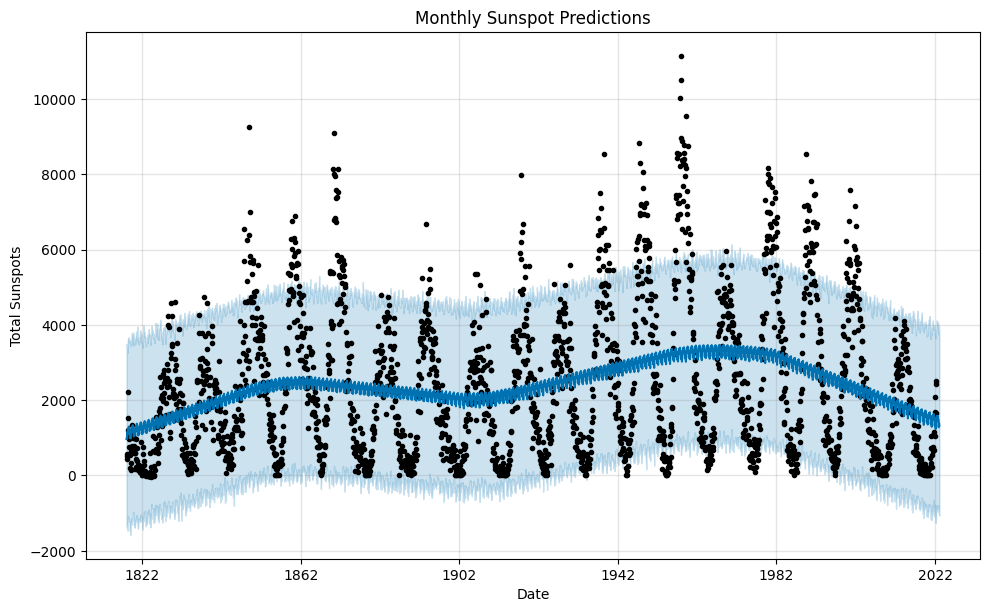

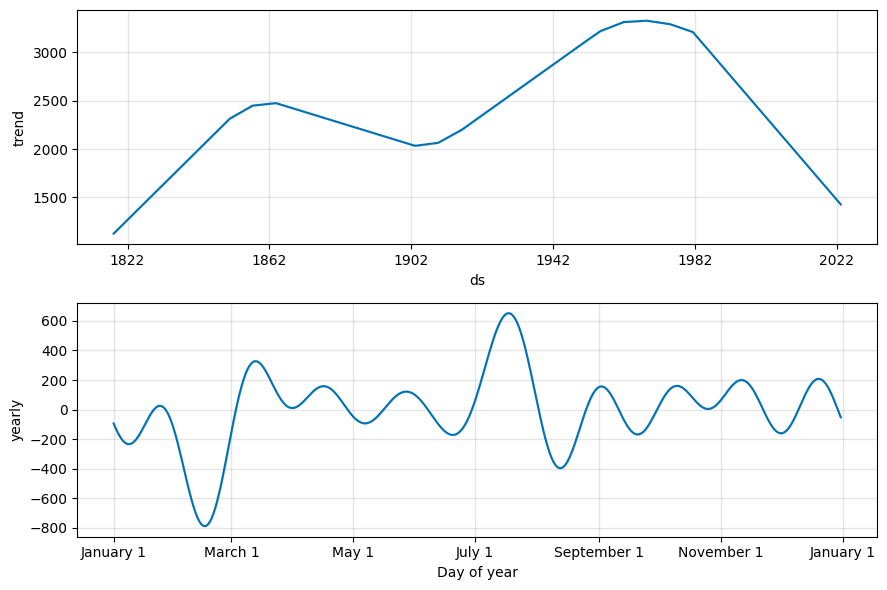

In [ ]:
# Prepare the data for Prophet with monthly frequency
monthly_df = daily_df.groupby(pd.Grouper(key='datetime', freq='M')).sum().reset_index()
monthly_df_prophet = monthly_df[['datetime', 'total_sunspots']].rename(columns={'datetime': 'ds', 'total_sunspots': 'y'})

# Create and fit the Prophet model
monthly_model = Prophet()
monthly_model.fit(monthly_df_prophet)

# Create future dates for prediction (in months)
future_months = monthly_model.make_future_dataframe(periods=9, freq='M')

# Make predictions
forecast_months = monthly_model.predict(future_months)

# Print predictions for 1, 6, and 9 months into the future
print("\nSunspot Predictions (Monthly):")
for months in [1, 6, 9]:
  predicted_sunspots = forecast_months.iloc[-months]['yhat']
  print(f"{months} months into the future: {predicted_sunspots}")

# Plot the monthly forecast
fig3 = monthly_model.plot(forecast_months)
plt.title("Monthly Sunspot Predictions")
plt.xlabel("Date")
plt.ylabel("Total Sunspots")

# Plot the components of the monthly forecast
fig4 = monthly_model.plot_components(forecast_months)

<ipython-input-13-9d54ee459532>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_df = daily_df.groupby(pd.Grouper(key='datetime', freq='Y')).sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/9nzmm2ry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/vbrx3uls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38', 'data', 'file=/tmp/tmpbfhtz2rv/9nzmm2ry.json', 'init=/tmp/tmpbfhtz2rv/vbrx3uls.json', 'output', 'file=/tmp/tmpbfhtz2rv/prophet_model36gx8ata/prophet_model-20241126210401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:04:01 - cmdst


Sunspot Predictions (Yearly):
1 years into the future: 32157.459511721187
10 years into the future: 31714.89668902891
20 years into the future: 31885.828139530422


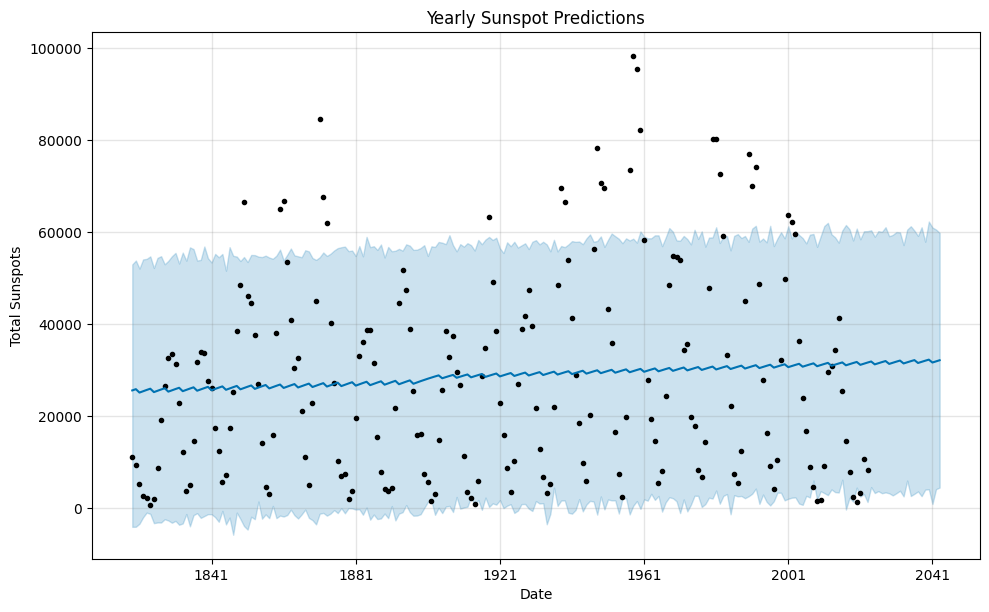

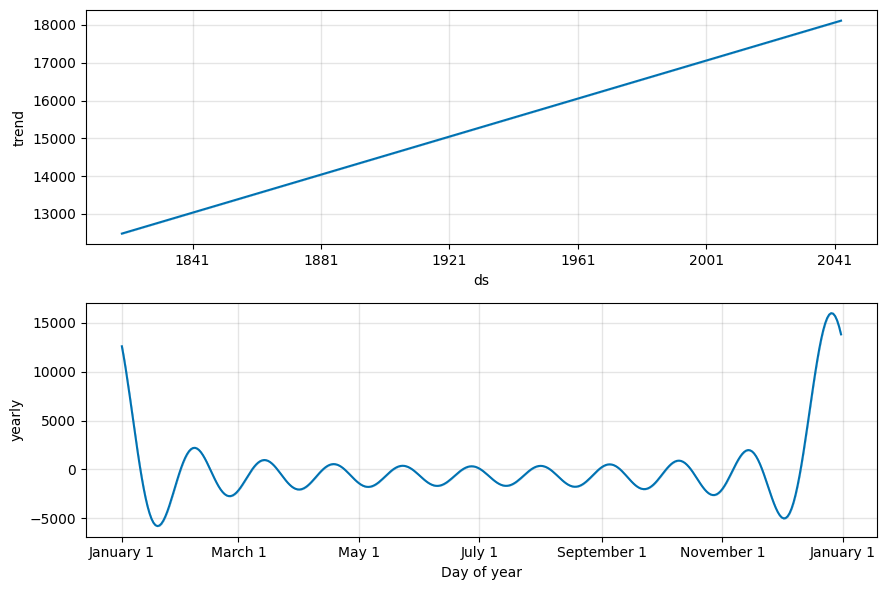

In [ ]:
# Prepare the data for Prophet with yearly frequency
yearly_df = daily_df.groupby(pd.Grouper(key='datetime', freq='Y')).sum().reset_index()
yearly_df_prophet = yearly_df[['datetime', 'total_sunspots']].rename(columns={'datetime': 'ds', 'total_sunspots': 'y'})

# Create and fit the Prophet model
yearly_model = Prophet()
yearly_model.fit(yearly_df_prophet)

# Create future dates for prediction (in years)
future_years = yearly_model.make_future_dataframe(periods=20, freq='Y')

# Make predictions
forecast_years = yearly_model.predict(future_years)

# Print predictions for 1, 10, and 20 years into the future
print("\nSunspot Predictions (Yearly):")
for years in [1, 10, 20]:
  predicted_sunspots = forecast_years.iloc[-years]['yhat']
  print(f"{years} years into the future: {predicted_sunspots}")

# Plot the yearly forecast
fig5 = yearly_model.plot(forecast_years)
plt.title("Yearly Sunspot Predictions")
plt.xlabel("Date")
plt.ylabel("Total Sunspots")

# Plot the components of the yearly forecast
fig6 = yearly_model.plot_components(forecast_years)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/w2hpazwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/q1kex5n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=702', 'data', 'file=/tmp/tmpbfhtz2rv/w2hpazwz.json', 'init=/tmp/tmpbfhtz2rv/q1kex5n4.json', 'output', 'file=/tmp/tmpbfhtz2rv/prophet_modelqov7y7kh/prophet_model-20241126210416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:04:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Sunspot Predictions:
100 days into the future: 18.693604539107668
200 days into the future: 24.996843183098544
365 days into the future: 27.62307206569308


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/ulce_hrt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/ypgkt9n9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46036', 'data', 'file=/tmp/tmpbfhtz2rv/ulce_hrt.json', 'init=/tmp/tmpbfhtz2rv/ypgkt9n9.json', 'output', 'file=/tmp/tmpbfhtz2rv/prophet_modelta34b3vv/prophet_model-20241126210530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:06:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


KeyboardInterrupt: 

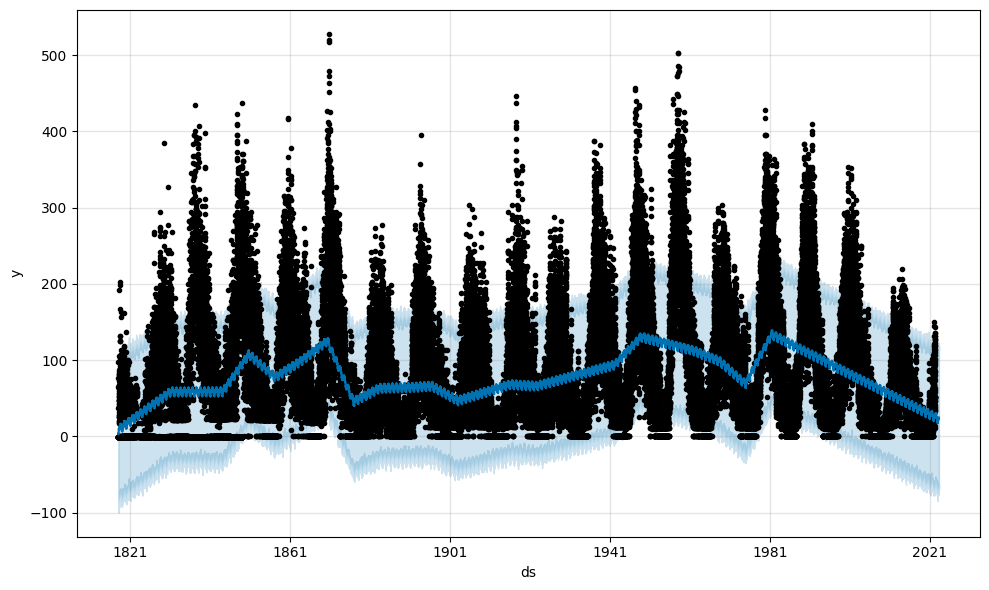

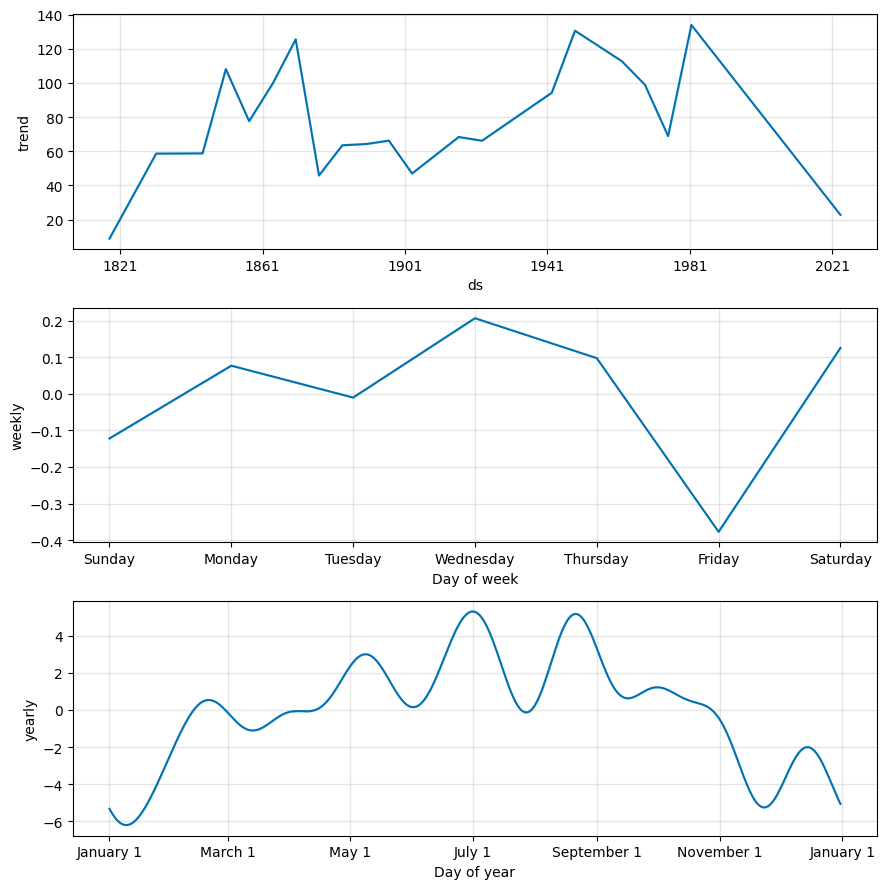

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Prepare the data for Prophet
daily_df_prophet = daily_df[['datetime', 'total_sunspots']].rename(columns={'datetime': 'ds', 'total_sunspots': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(daily_df_prophet)

# Create future dates for prediction
future = model.make_future_dataframe(periods=365, freq='D') # Predict for 365 days

# Make predictions
forecast = model.predict(future)

# Print predictions for 100, 200, and 365 days into the future
print("Sunspot Predictions:")
for days in [100, 200, 365]:
  predicted_sunspots = forecast.iloc[-days]['yhat']
  print(f"{days} days into the future: {predicted_sunspots}")

# Plot the forecast
fig1 = model.plot(forecast)
# Plot the components of the forecast
fig2 = model.plot_components(forecast)

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mape, r2

#with different growth settings
growth_settings = ['logistic', 'linear', 'flat']
for growth in growth_settings:
  model_growth = Prophet(growth=growth)

  if growth == 'logistic':
    capacity = daily_df_prophet['y'].max() * 1.1
    daily_df_prophet['cap'] = capacity
    future['cap'] = capacity
  model_growth.fit(daily_df_prophet)
  forecast_growth = model_growth.predict(future)
  if growth == 'logistic':
    daily_df_prophet = daily_df_prophet.drop('cap', axis=1)

  # Evaluate the model for the current growth setting
  mae_growth, mape_growth, r2_growth = evaluate_model(daily_df_prophet['y'][-365:], forecast_growth['yhat'][-365:]) # Evaluate using last 365 days
  print(f"\nGrowth: {growth}")
  print(f"MAE: {mae_growth}, MAPE: {mape_growth}, R2: {r2_growth}")

  print(f"Predictions for {growth} growth:")
  for days in [100, 200, 365]:
    predicted_sunspots = forecast_growth.iloc[-days]['yhat']
    print(f"{days} days into the future: {predicted_sunspots}")

#with different seasonalities
seasonalities = [{'period': 30, 'fourier_order': 5}, {'period': 365, 'fourier_order': 10}]
for season in seasonalities:
  m = Prophet()
  m.add_seasonality(name='custom_season', period=season['period'], fourier_order=season['fourier_order'])
  m.fit(daily_df_prophet)
  future_s = m.make_future_dataframe(periods=365, freq='D')
  forecast_s = m.predict(future_s)
  mae_s, mape_s, r2_s = evaluate_model(daily_df_prophet['y'][-365:], forecast_s['yhat'][-365:])
  print(f"\nSeasonality: period={season['period']}, fourier_order={season['fourier_order']}")
  print(f"MAE: {mae_s}, MAPE: {mape_s}, R2: {r2_s}")

  print(f"Predictions for custom seasonality:")
  for days in [100, 200, 365]:
      predicted_sunspots = forecast_s.iloc[-days]['yhat']
      print(f"{days} days into the future: {predicted_sunspots}")

#with different changepoint settings
changepoint_settings = [{'n_changepoints': 10, 'changepoint_prior_scale': 0.05},
                        {'n_changepoints': 25, 'changepoint_prior_scale': 0.5}]
for setting in changepoint_settings:
  m = Prophet(n_changepoints=setting['n_changepoints'], changepoint_prior_scale=setting['changepoint_prior_scale'])
  m.fit(daily_df_prophet)
  future_c = m.make_future_dataframe(periods=365, freq='D')
  forecast_c = m.predict(future_c)
  mae_c, mape_c, r2_c = evaluate_model(daily_df_prophet['y'][-365:], forecast_c['yhat'][-365:])
  print(f"\nChangepoint: n_changepoints={setting['n_changepoints']}, changepoint_prior_scale={setting['changepoint_prior_scale']}")
  print(f"MAE: {mae_c}, MAPE: {mape_c}, R2: {r2_c}")

  print(f"Predictions for changepoint settings:")
  for days in [100, 200, 365]:
      predicted_sunspots = forecast_c.iloc[-days]['yhat']
      print(f"{days} days into the future: {predicted_sunspots}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/b381r793.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/ju2wxq33.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60686', 'data', 'file=/tmp/tmpbfhtz2rv/b381r793.json', 'init=/tmp/tmpbfhtz2rv/ju2wxq33.json', 'output', 'file=/tmp/tmpbfhtz2rv/prophet_modelo16b2489/prophet_model-20241126211333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:13:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/


Sunspot Predictions (Monthly - Tuned):
1 months into the future: 675.8890640032458
6 months into the future: 640.8890422187253
9 months into the future: 727.0252365874146


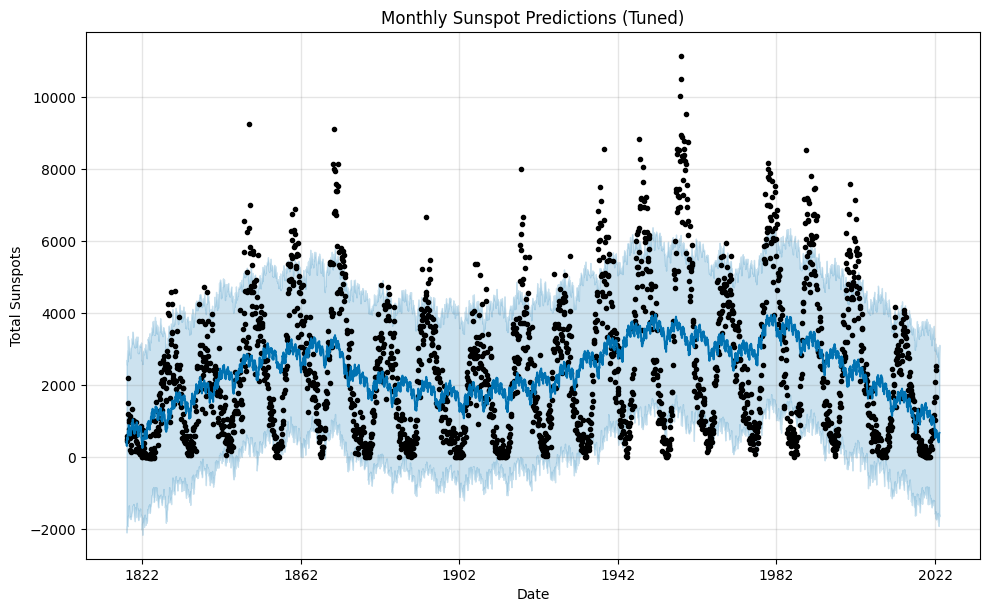

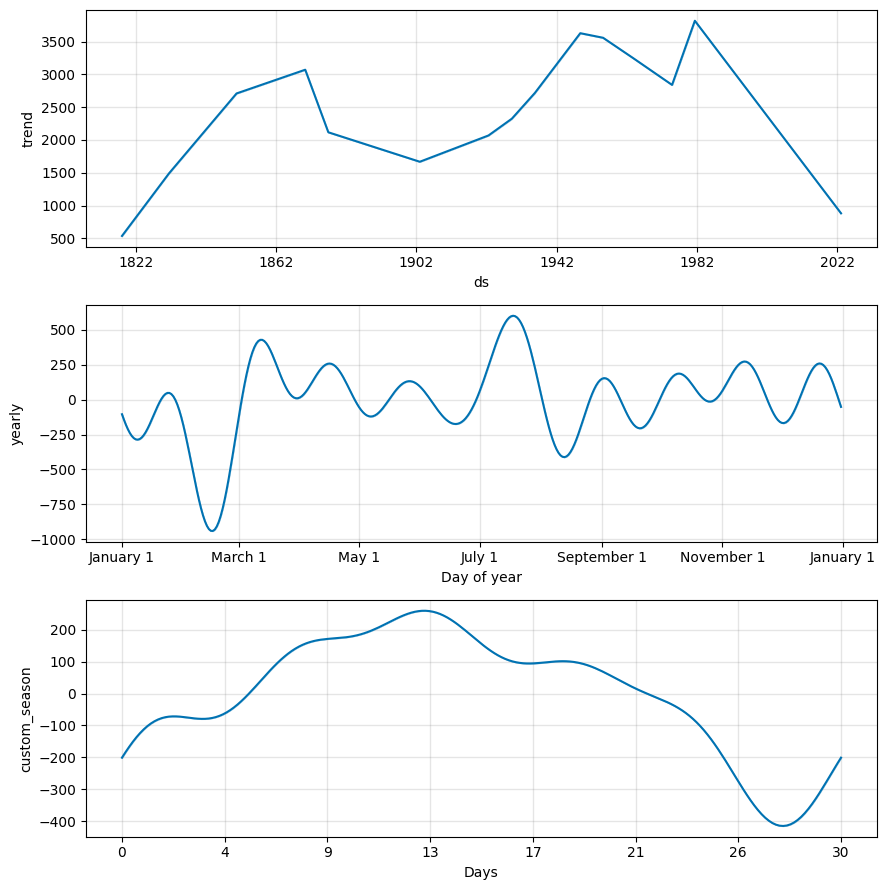

In [ ]:
best_growth = 'linear'
best_seasonality = {'period': 30, 'fourier_order': 5}
best_changepoint = {'n_changepoints': 25, 'changepoint_prior_scale': 0.5}

# Create and fit the Prophet model with best settings
monthly_model_tuned = Prophet(growth=best_growth,
                             n_changepoints=best_changepoint['n_changepoints'],
                             changepoint_prior_scale=best_changepoint['changepoint_prior_scale'])


monthly_model_tuned.add_seasonality(name='custom_season', period=best_seasonality['period'], fourier_order=best_seasonality['fourier_order'])


monthly_model_tuned.fit(monthly_df_prophet)


# Create future dates for prediction (in months)
future_months = monthly_model_tuned.make_future_dataframe(periods=9, freq='M')


# Make predictions
forecast_months_tuned = monthly_model_tuned.predict(future_months)

# Print predictions for 1, 6, and 9 months into the future
print("\nSunspot Predictions (Monthly - Tuned):")
for months in [1, 6, 9]:
    predicted_sunspots = forecast_months_tuned.iloc[-months]['yhat']
    print(f"{months} months into the future: {predicted_sunspots}")


# Plot the tuned monthly forecast (optional)
fig7 = monthly_model_tuned.plot(forecast_months_tuned)
plt.title("Monthly Sunspot Predictions (Tuned)")
plt.xlabel("Date")
plt.ylabel("Total Sunspots")
plt.show()

fig8 = monthly_model_tuned.plot_components(forecast_months_tuned)
plt.show()

In [ ]:
# Prepare the data for Prophet with yearly frequency
yearly_df = daily_df.groupby(pd.Grouper(key='datetime', freq='Y')).sum().reset_index()
yearly_df_prophet = yearly_df[['datetime', 'total_sunspots']].rename(columns={'datetime': 'ds', 'total_sunspots': 'y'})

# Define parameter settings to test
growth_settings = ['logistic', 'linear', 'flat']
seasonality_settings = [{'period': 10, 'fourier_order': 3}, {'period': 11, 'fourier_order': 5}] # Example seasonalities
changepoint_settings = [{'n_changepoints': 5, 'changepoint_prior_scale': 0.01}, {'n_changepoints': 10, 'changepoint_prior_scale': 0.1}]

# Store results for comparison
results = []

# Loop through each parameter combination
for growth in growth_settings:
    for seasonality in seasonality_settings:
        for changepoint in changepoint_settings:
            # Create and fit the Prophet model with the current settings
            model = Prophet(growth=growth,
                            n_changepoints=changepoint['n_changepoints'],
                            changepoint_prior_scale=changepoint['changepoint_prior_scale'])
            model.add_seasonality(name='custom_season', period=seasonality['period'], fourier_order=seasonality['fourier_order'])

            if growth == 'logistic':
                capacity = yearly_df_prophet['y'].max() * 1.1
                yearly_df_prophet['cap'] = capacity

            model.fit(yearly_df_prophet)

            # Create future_years DataFrame here, after potentially adding 'cap'
            future_years = model.make_future_dataframe(periods=20, freq='Y')

            if growth == 'logistic':
                future_years['cap'] = capacity # Add 'cap' to future_years for logistic growth

            forecast_years = model.predict(future_years)
            # Evaluate the model
            mae, mape, r2 = evaluate_model(yearly_df_prophet['y'], forecast_years['yhat'][:-20])
            predictions = [forecast_years['yhat'].iloc[-1], forecast_years['yhat'].iloc[-10], forecast_years['yhat'].iloc[-20]]

            results.append({
                'growth': growth,
                'seasonality': seasonality,
                'changepoint': changepoint,
                'mae': mae,
                'mape': mape,
                'r2': r2,
                'predictions': predictions  # Store predictions for 1, 10, 20 years
            })

# Display and analyze the results
for result in results:
    print(f"Growth: {result['growth']}, Seasonality: {result['seasonality']}, Changepoint: {result['changepoint']}")
    print(f"  MAE: {result['mae']:.2f}, MAPE: {result['mape']:.2f}, R2: {result['r2']:.2f}")
    print("  Predictions (1, 10, 20 years):", result['predictions'])

plt.show()

<ipython-input-23-f743fad00904>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_df = daily_df.groupby(pd.Grouper(key='datetime', freq='Y')).sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/9b5gba_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfhtz2rv/ybeeeo45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52060', 'data', 'file=/tmp/tmpbfhtz2rv/9b5gba_j.json', 'init=/tmp/tmpbfhtz2rv/ybeeeo45.json', 'output', 'file=/tmp/tmpbfhtz2rv/prophet_modela73k94aw/prophet_model-20241126212030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:20:30 - cm

Growth: logistic, Seasonality: {'period': 10, 'fourier_order': 3}, Changepoint: {'n_changepoints': 5, 'changepoint_prior_scale': 0.01}
  MAE: 18366.62, MAPE: 2.38, R2: 0.01
  Predictions (1, 10, 20 years): [28659.74661316737, 30368.78891702862, 29205.449861658733]
Growth: logistic, Seasonality: {'period': 10, 'fourier_order': 3}, Changepoint: {'n_changepoints': 10, 'changepoint_prior_scale': 0.1}
  MAE: 18363.59, MAPE: 2.37, R2: 0.02
  Predictions (1, 10, 20 years): [30344.58103616607, 31461.659347515146, 31675.173398725936]
Growth: logistic, Seasonality: {'period': 11, 'fourier_order': 5}, Changepoint: {'n_changepoints': 5, 'changepoint_prior_scale': 0.01}
  MAE: 18391.48, MAPE: 2.33, R2: 0.01
  Predictions (1, 10, 20 years): [29267.685147553762, 25685.265642863575, 26847.13297481023]
Growth: logistic, Seasonality: {'period': 11, 'fourier_order': 5}, Changepoint: {'n_changepoints': 10, 'changepoint_prior_scale': 0.1}
  MAE: 18389.51, MAPE: 2.31, R2: 0.02
  Predictions (1, 10, 20 years